In [1]:
import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 8
# jerk times as defined in catalogue
jerk_times = [4605,5750,2920, 1915, 6450,7295,7620,7844,8878,9673,10593,12619,13412,13543]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
times_hist_bin = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200) + 0.5
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure

CP_EDGES = np.arange(-225,226,50) + jerk_times[jerk_number]

filename = "../ensemble_diagnostics/Jerk"+str(jerk_number+1)+"_5x5_20M.results"
with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)

# make plot of the max probability of a jerks over a window of t0 +/- 25 years

y_theta, y_phi,y_prob = [],[],[]

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = results[j][2]
    CP = results[j][3]
    
    if component == 1:
        y_theta.append(theta); y_phi.append(phi)
        y_prob.append ( CP[-1]  )
    
cmap = plt.get_cmap('viridis')
plt.figure()
axes = [0]
f, axes[0] = plt.subplots(nrows=1, ncols=1, figsize=(5,10),subplot_kw={'projection': ccrs.PlateCarree() }) 
y_prob = np.array(y_prob)
marker_size = 7. 


i=0   
cax = axes[i].scatter(y_phi,90.-np.array(y_theta), s = marker_size, c=y_prob,cmap=cmap, vmin=0, vmax=1)
gl = axes[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
              linewidth=2, color='gray', alpha=0.5, linestyle='--')
    
axes[i].coastlines()

gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -135., -90, -45., 0, 45., 90, 135., 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


outfname = 'Jerk_prob_map_'+str(jerk_number+1)+ '_5x5_20M'
f.savefig(outfname + '.pdf',bbox_inches = 'tight')
#f.savefig(outfname + '.png',bbox_inches = 'tight')

print('Global average probability (%): {0:.0f}%'.format(np.sum(y_prob)/len(y_prob)*100 ))
np.savetxt('jerk_finder_event' + str(jerk_number+1) +'.txt',np.vstack((y_theta, y_phi, y_prob)).T, fmt='%d %d %.4f')


FileNotFoundError: [Errno 2] No such file or directory: '../ensemble_diagnostics/Jerk9_5x5_20M.results'

In [2]:
filename

'../ensemble_diagnostics/Jerk9_5x5_20M.results'

Shape of gmn array:  (960, 50001)
Times (in years) of output [ 4200.   4200.2  4200.4 ... 14199.6 14199.8 14200. ]


<Figure size 432x288 with 0 Axes>

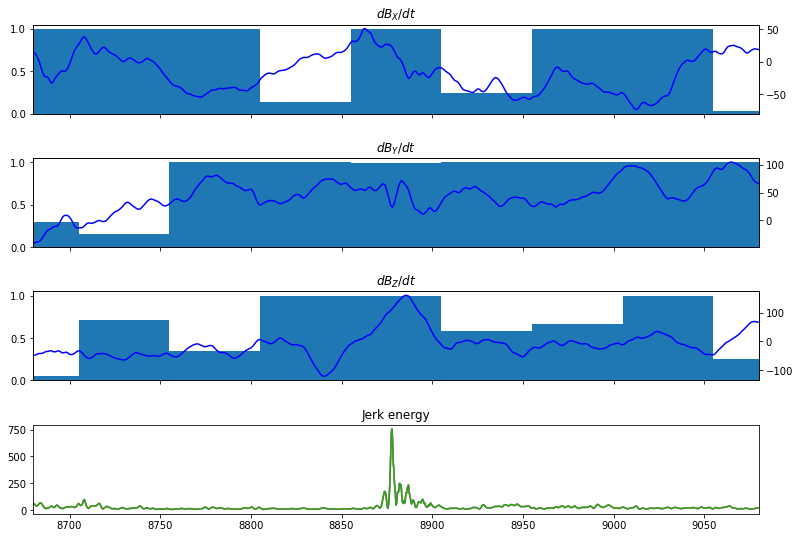

In [33]:
# Plot jerk at a specific location

import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 8 
# jerk times as defined in catalogue
jerk_times = [4600,5750,2920, 1915, 6490,7300,7620,7840,8880,9673,10590,12620,13411,13546]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure

filename = "../ensemble_diagnostics/Jerk"+str(jerk_number+1)+"_5x5_20M.results"
with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)
        
        
import chaosmagpy as cp
# import the dataset
import h5py
filepath = '../Gauss_Bsurf.mat'
arrays = {}
f = h5py.File(filepath,'r')
for k, v in f.items():
    arrays[k] = np.array(v)

coeffs = arrays['gnm'][:,:].T
time = arrays['timers'].flatten()
print( 'Shape of gmn array: ', arrays['gnm'].shape )
print ('Times (in years) of output', time )
radius = 6371.2
TIMES = time_yearly
NUM_DATA = len(TIMES)
TIMES_MIN = TIMES.min()
TIMES_MAX = TIMES.max()
CP_EDGES = np.arange(-225,226,50) + jerk_times[jerk_number]
CP_NBINS = CP_EDGES.shape[0] - 1

plt.figure()
f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(13,9), sharex=True)

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = results[j][2]
    CP = results[j][3]
    if(theta==40 and phi == 90):
        #theta=90
        #phi=80
        Br, Btheta, Bphi = cp.model_utils.synth_values(coeffs, radius, theta, phi,nmax=13)
        Br_yearly,Btheta_yearly, Bphi_yearly = np.interp(time_yearly, time, Br ), np.interp(time_yearly, time, Btheta ), np.interp(time_yearly, time, Bphi )
        Bx_dot, By_dot, Bz_dot = -np.gradient(Btheta_yearly,time_yearly), np.gradient(Bphi_yearly,time_yearly), -np.gradient(Br_yearly,time_yearly)
        left_edges = CP_EDGES[0:CP_NBINS]
        if component == 0:
            ax1.bar(left_edges, CP, align='edge', width = 1*(left_edges[1] - left_edges[0]))
            ax1.set_xlim(time_yearly.min(), time_yearly.max() )
            ax5 = ax1.twinx()
            ax5.plot(TIMES,Bx_dot,'b')
            ax1.set_title(r'$d{B_X}/dt$')

        if component == 1:
            ax2.bar(left_edges, CP, align='edge', width = 1*(left_edges[1] - left_edges[0]))
            ax2.set_xlim(time_yearly.min(), time_yearly.max() )
            ax5 = ax2.twinx()
            ax5.plot(TIMES,By_dot,'b')
            ax2.set_title(r'$d{B_Y}/dt$')

        if component == 2:
            ax3.bar(left_edges, CP, align='edge', width = 1*(left_edges[1] - left_edges[0]))
            ax3.set_xlim(time_yearly.min(), time_yearly.max() )
            ax5 = ax3.twinx()
            ax5.plot(TIMES,Bz_dot,'b')
            ax3.set_title(r'$d{B_Z}/dt$')

        time_EJ, EJ = np.loadtxt('../Jerk_energy.dat',unpack=True)
        ax4.plot(time_EJ, EJ )

        ax4.set_xlim(time_yearly.min(), time_yearly.max()  )
        ax4.set_title('Jerk energy')


        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

        outfname = 'Jerk'+str(jerk_number+1)+'_ts_theta'+str(theta)+'_phi'+str(phi)
        #plt.savefig(outfname+'.pdf')
        #plt.savefig(outfname+'.png')


In [15]:
CP.shape

(9,)

In [31]:
CP

array([0.052895, 0.99698 , 0.481595, 0.68523 , 0.999905, 1.      ,
       1.      , 1.      , 0.937745])

In [32]:
CP_EDGES

array([8655, 8705, 8755, 8805, 8855, 8905, 8955, 9005, 9055, 9105])

In [25]:
left_edges

array([8655, 8705, 8755, 8805, 8855, 8905, 8955, 9005, 9055])

In [26]:
CP_NBINS

11